In [63]:
import pandas as pd

# Load the dataset
df = pd.read_csv("../data/Telco-Customer-Churn.csv")

# Preview
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [64]:
import shap

shap.initjs()


In [65]:
# Check structure and types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [66]:
# Summary stats (for numerical columns)
df.describe()


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [67]:
# Missing values per column
df.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [68]:
df.drop(columns=["customerID"], errors="ignore", inplace=True)


In [69]:
# Check how many customers churned vs. not
df['Churn'].value_counts()


Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [70]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].median())


In [71]:
df_encoded = pd.get_dummies(df, drop_first=True)


In [72]:
df_encoded["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})


In [73]:
!pip install scikit-learn


In [74]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split features and target
X = df_encoded.drop("Churn", axis=1)
y = df_encoded["Churn"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the numeric data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize and train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1036
           1       1.00      1.00      1.00       373

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409


Confusion Matrix:
 [[1036    0]
 [   0  373]]


In [76]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [77]:
from xgboost import XGBClassifier

# Train the model
xgb_model = XGBClassifier(eval_metric='logloss')
xgb_model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_xgb = xgb_model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))



Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1036
           1       1.00      1.00      1.00       373

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409


Confusion Matrix:
 [[1036    0]
 [   0  373]]


In [78]:
!pip install shap

In [79]:
!pip install numpy==2.2.0


In [80]:
import shap
shap.initjs()  # ensures JS is loaded for visualizations

# Create the explainer
explainer = shap.Explainer(xgb_model, X_train_scaled)

# Generate SHAP values – this is now an Explanation object
shap_values = explainer(X_test_scaled)

# Optional: Create a DataFrame for the test data to get column names
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

# Show the force plot for the first sample
shap.plots.force(shap_values[0])


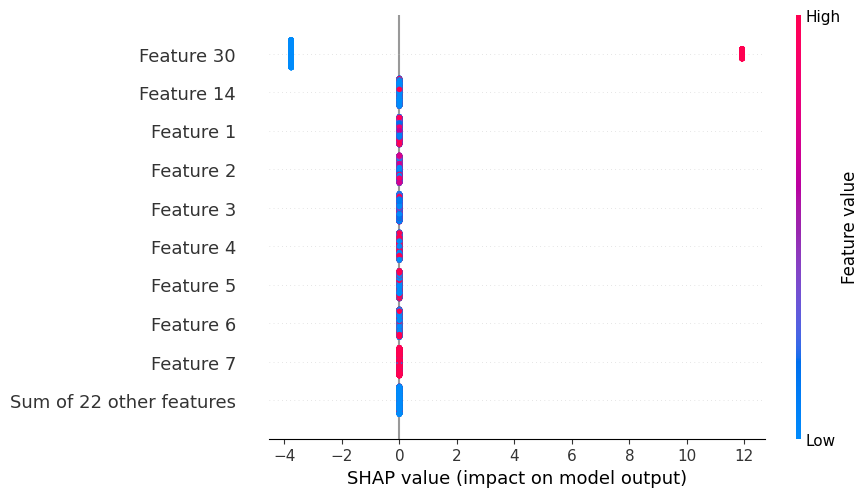

In [81]:
shap.plots.beeswarm(shap_values)


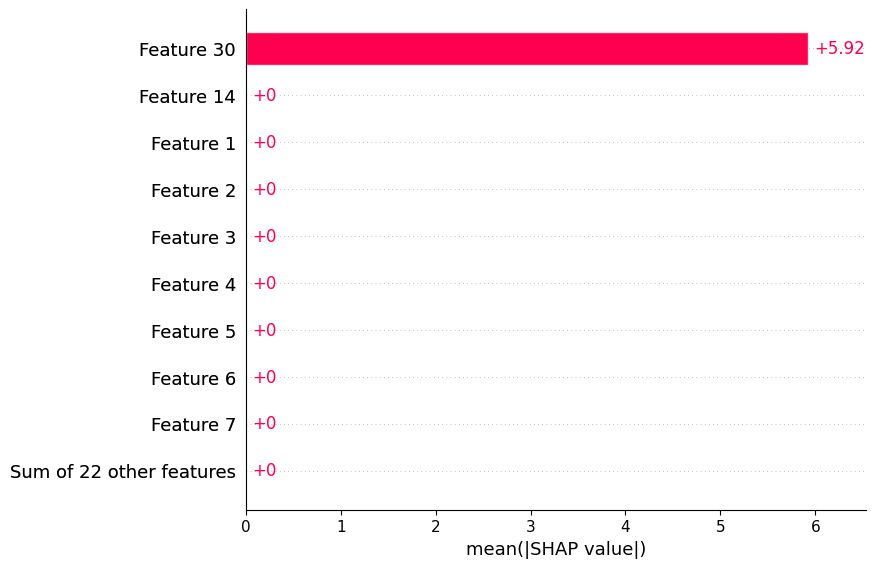

In [82]:
shap.plots.bar(shap_values)


In [83]:
import shap
shap.initjs()


In [84]:
shap.plots.force(shap_values[0])



In [85]:
import shap
shap.initjs()

explainer = shap.Explainer(xgb_model, X_train_scaled)
shap_values = explainer(X_test_scaled)

# Display the force plot for the first instance
shap.plots.force(shap_values[0])



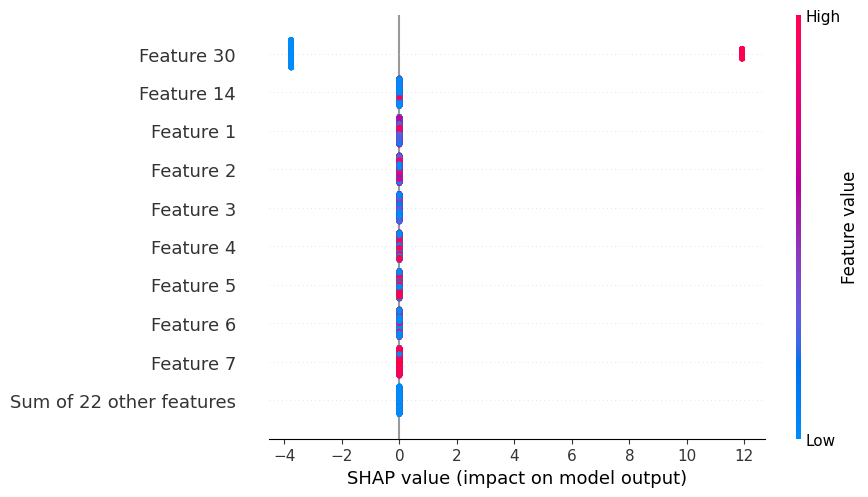

In [86]:
shap.plots.beeswarm(shap_values)


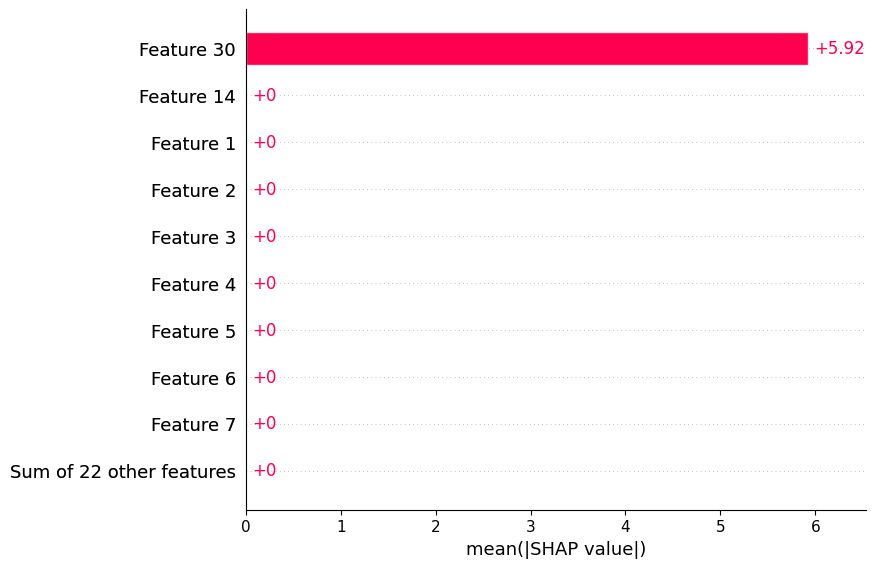

In [89]:
shap.plots.bar(shap_values)


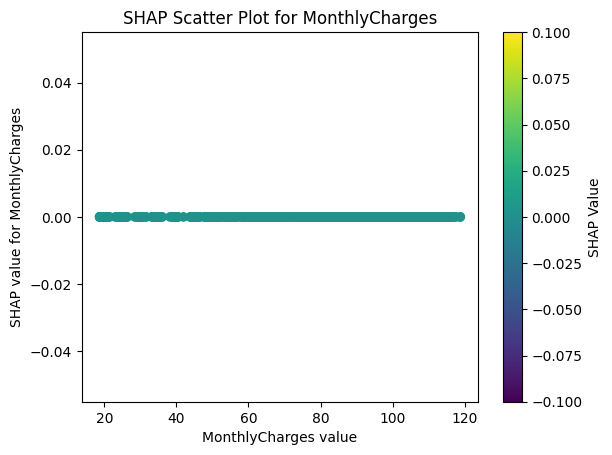

In [93]:
import shap
import matplotlib.pyplot as plt

# Specify feature name and get its column index
feature = "MonthlyCharges"
feature_index = X_test.columns.get_loc(feature)

# Plot using matplotlib
plt.scatter(
    X_test[feature],                          # X-axis: actual feature values
    shap_values.values[:, feature_index],     # Y-axis: SHAP values
    c=shap_values.values[:, feature_index],   # color by SHAP values
    cmap="viridis"
)
plt.xlabel(f"{feature} value")
plt.ylabel(f"SHAP value for {feature}")
plt.title(f"SHAP Scatter Plot for {feature}")
plt.colorbar(label="SHAP Value")
plt.show()


In [94]:
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns) 
shap_values = explainer(X_test_scaled_df)



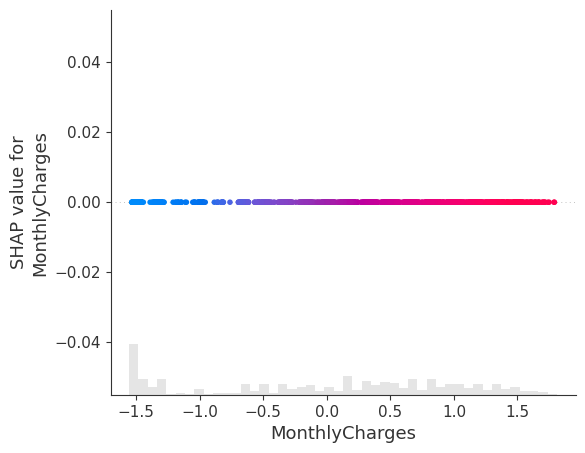

In [95]:
shap.plots.scatter(shap_values[:, shap_values.feature_names.index("MonthlyCharges")], color=shap_values)


Saved 10 high-quality plots in: shap_scatter_plots


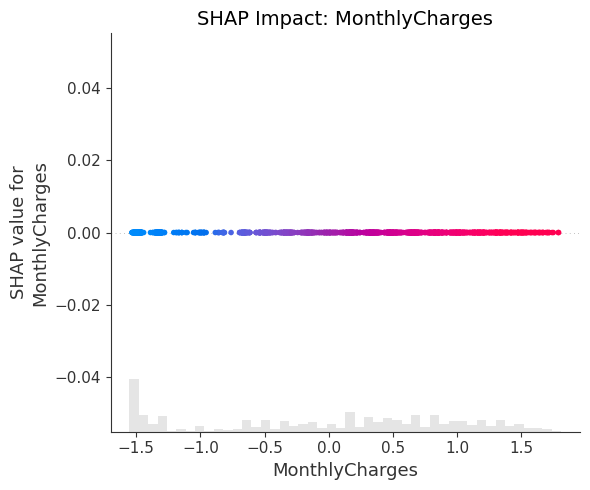

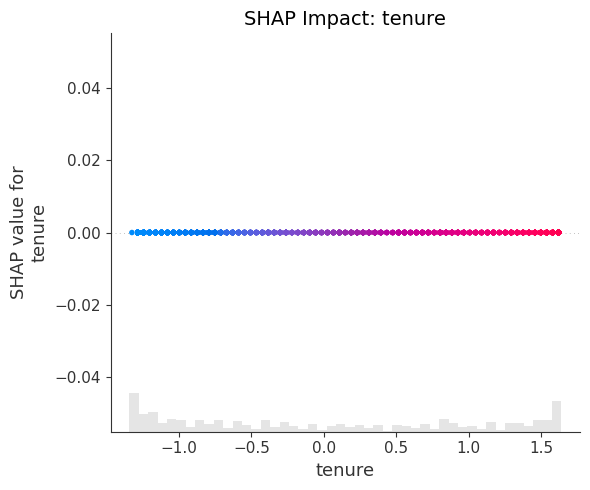

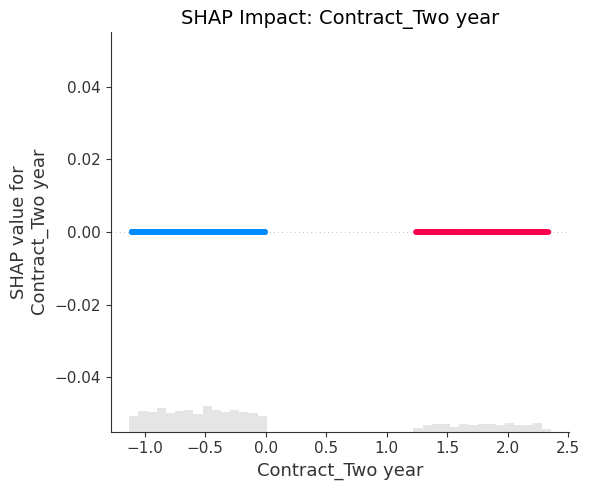

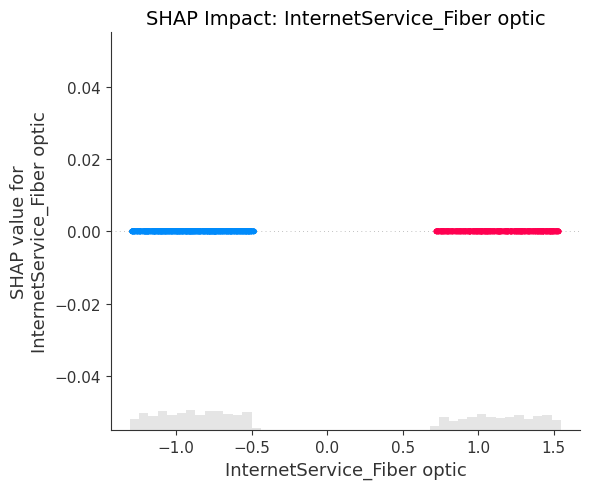

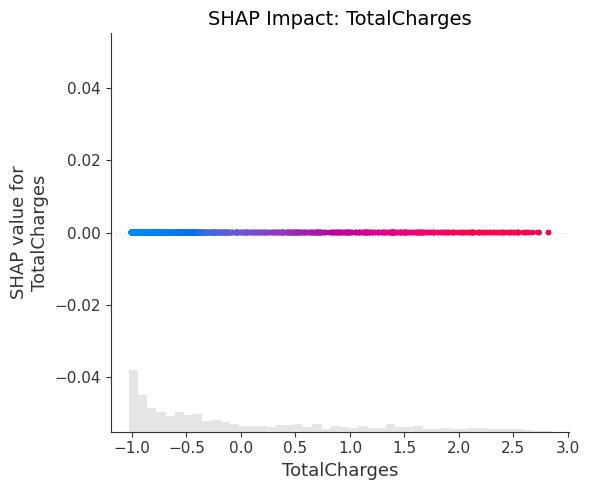

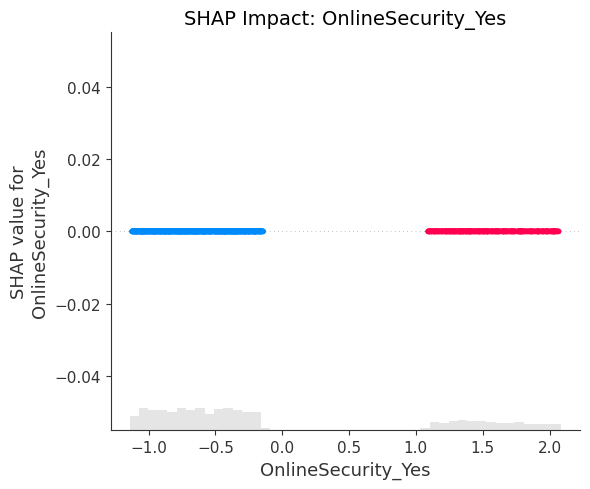

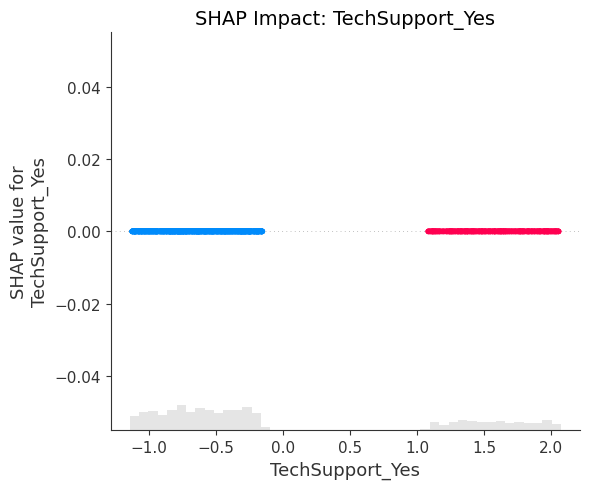

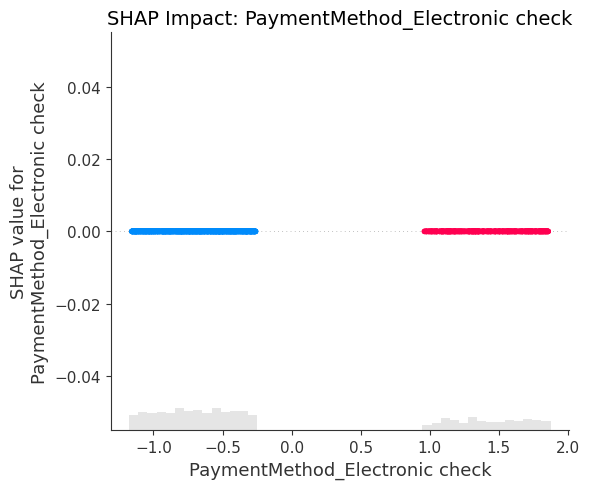

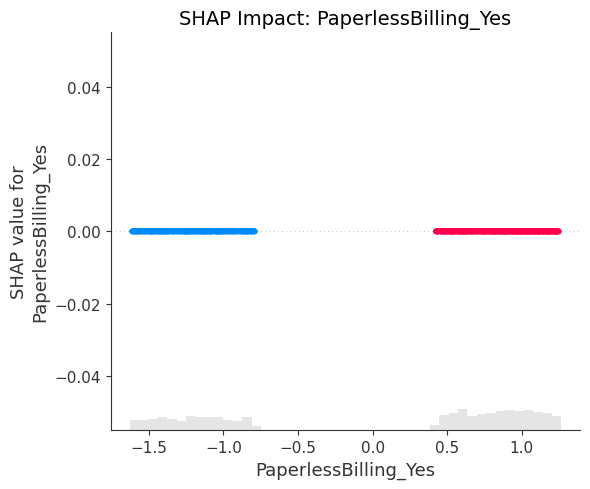

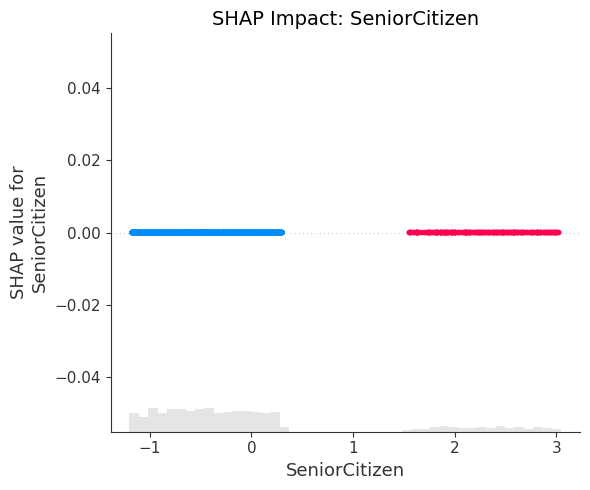

In [96]:
import shap
import matplotlib.pyplot as plt
import os

# Initialize SHAP JavaScript rendering if needed
shap.initjs()

# List of top 10 features to plot
top_features = [
    'MonthlyCharges',
    'tenure',
    'Contract_Two year',
    'InternetService_Fiber optic',
    'TotalCharges',
    'OnlineSecurity_Yes',
    'TechSupport_Yes',
    'PaymentMethod_Electronic check',
    'PaperlessBilling_Yes',
    'SeniorCitizen'
]

# Output directory
output_dir = "shap_scatter_plots"
os.makedirs(output_dir, exist_ok=True)

# Settings for figure size and DPI
figsize = (8, 5)     # Width x Height in inches
dpi = 300            # High resolution for portfolio

# Generate and save plots
for feature in top_features:
    fig = plt.figure(figsize=figsize, dpi=dpi)
    shap.plots.scatter(shap_values[:, feature], color=shap_values, show=False)
    plt.title(f"SHAP Impact: {feature}", fontsize=14)
    plt.tight_layout()
    fig.savefig(os.path.join(output_dir, f"{feature}_shap_scatter.png"))
    plt.close(fig)

print(f"Saved {len(top_features)} high-quality plots in: {output_dir}")


In [97]:
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)


In [98]:
shap.force_plot(shap_values[0])


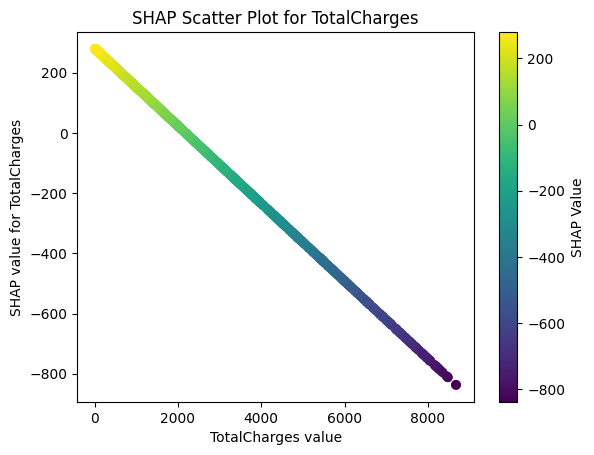

In [99]:
feature = "TotalCharges"  # or 'tenure', 'InternetService', etc.
feature_index = X_test.columns.get_loc(feature)

plt.scatter(
    X_test[feature],
    shap_values.values[:, feature_index],
    c=shap_values.values[:, feature_index],
    cmap="viridis"
)
plt.xlabel(f"{feature} value")
plt.ylabel(f"SHAP value for {feature}")
plt.title(f"SHAP Scatter Plot for {feature}")
plt.colorbar(label="SHAP Value")
plt.show()


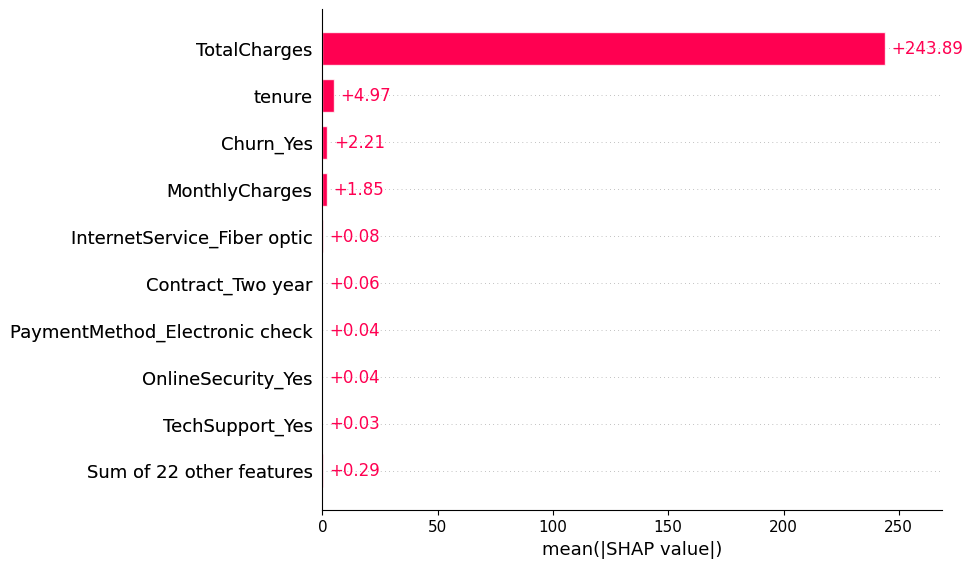

In [101]:
shap.plots.bar(shap_values)
